In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movie = pd.read_csv(r"./data/IMDB-Movie-Data.csv")
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# 我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [4]:
movie.Rating.mean()

6.723200000000003

In [5]:
movie.Director.nunique()

644

# 对于这一组电影数据，如果我们想Rating，Runtime (Minutes)的分布情况，应该如何呈现数据？

In [6]:
min_ = movie.Rating.min()
max_ = movie.Rating.max()
t1 = np.linspace(min_, max_, 21)

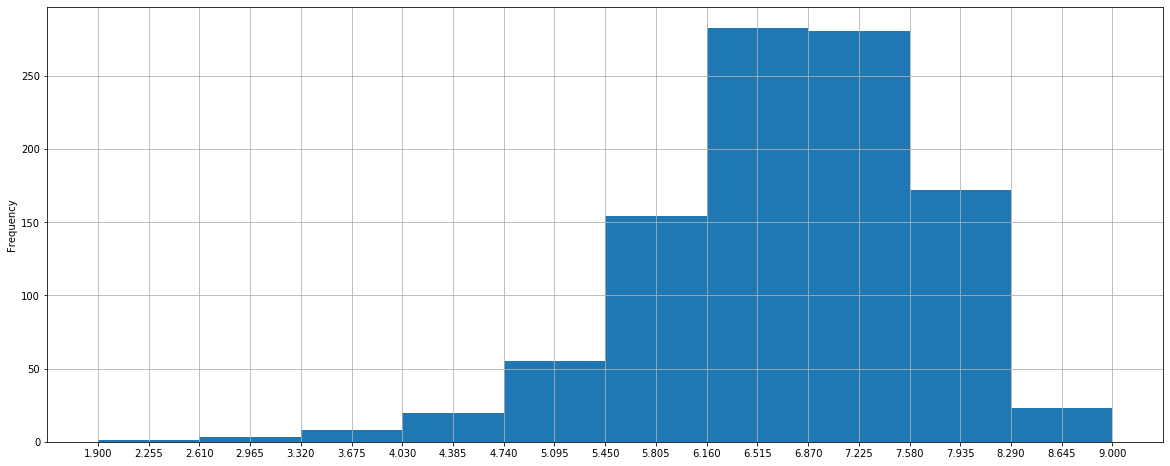

In [7]:
#Rating分布
movie.Rating.plot(kind='hist', grid=True, xticks=t1, figsize=(20, 8))

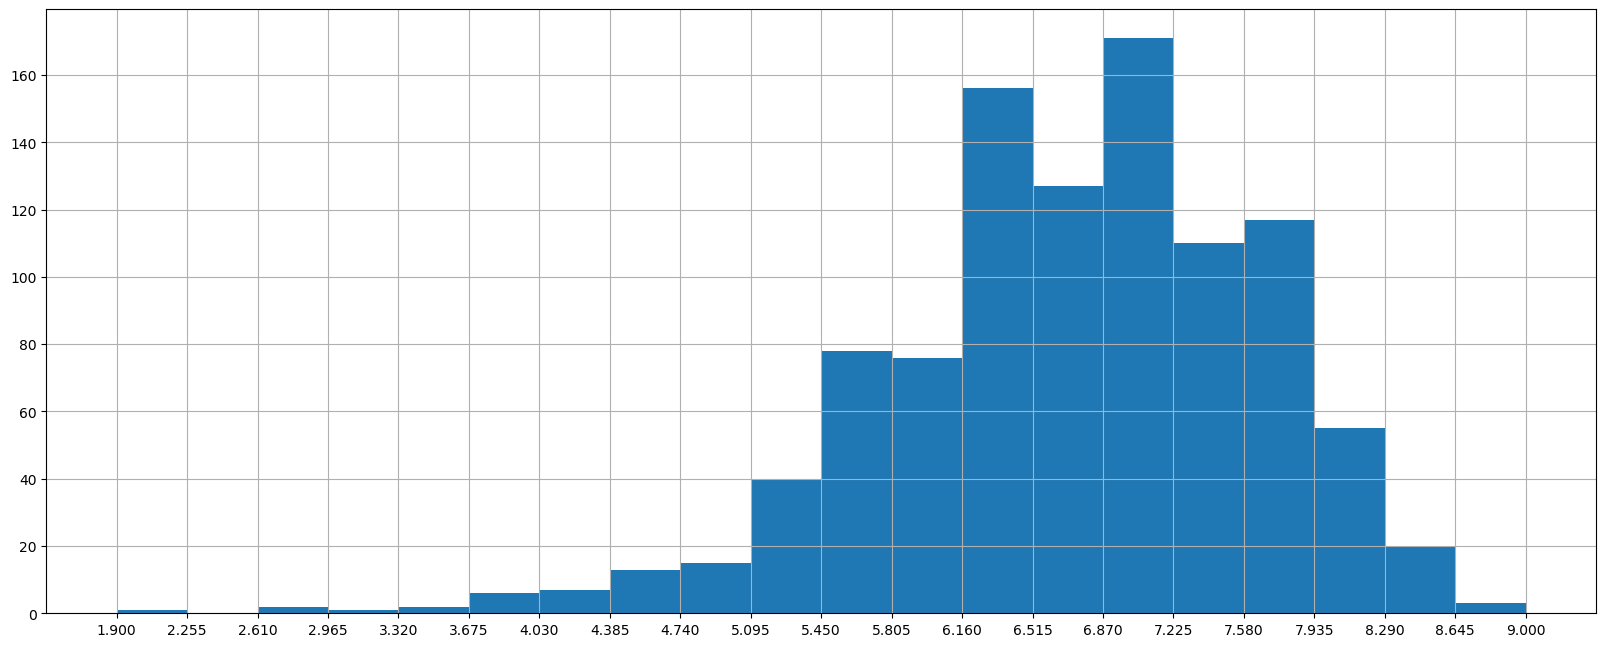

In [8]:
plt.figure(figsize=(20, 8), dpi=100)
plt.hist(movie.Rating, bins=20)

plt.xticks(t1)
plt.grid()

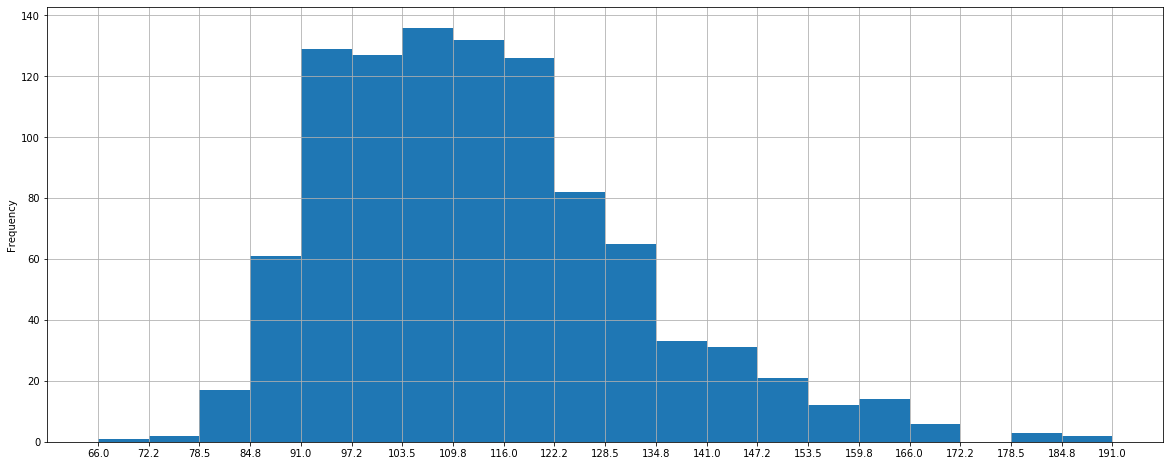

In [14]:
runtime_min = movie['Runtime (Minutes)'].min()
runtime_max = movie['Runtime (Minutes)'].max()
t2 = np.linspace(runtime_min, runtime_max, 21)
movie['Runtime (Minutes)'].plot(kind='hist', xticks=t2, grid=True, figsize=(20, 8), bins=20)

# 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [23]:
#用字符串分割
temp_list = [i.split(',') for i in movie.Genre]
#获取电影分类
genre_list = set(i for j in temp_list for i in j)
# 增加新的列
temp_df = pd.DataFrame(np.zeros([movie.shape[0], len(genre_list)]), columns=genre_list)
genre_list

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [24]:
# 遍历每一部电影，temp_df中把分类出现的列值设置为1
for i in temp_df.index:
    temp_df.loc[i, temp_list[i]] = 1

In [26]:
temp_df.sum().sort_values()

Musical        5.0
Western        7.0
War           13.0
Music         16.0
Sport         18.0
History       29.0
Animation     49.0
Family        51.0
Biography     81.0
Fantasy      101.0
Mystery      106.0
Horror       119.0
Sci-Fi       120.0
Romance      141.0
Crime        150.0
Thriller     195.0
Adventure    259.0
Comedy       279.0
Action       303.0
Drama        513.0
dtype: float64

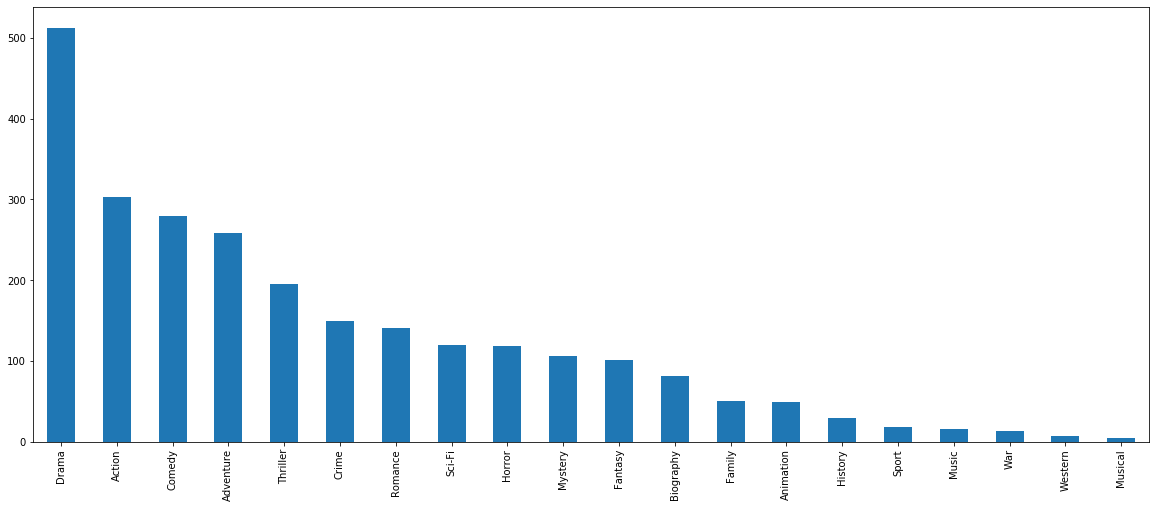

In [28]:
temp_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(20, 8))